# Homework 1: Problems
### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1

Practice your git and github skills by submitting this homework via github:

* Clone the class github repository to your computer, the one at https://github.com/gtrichards/PHYS_T480_F18/  (should already have done this).
* Click the Github Classroom link you received via the mailing list. This will create a private github repository through which you'll be submitting your homeworks. Clone that repository to your computer.
* Copy this notebook from the class github repository to your private homework submission repository. IMPORTANT: rename it to `<filename>-FirstLast.ipynb` once you copy it, where `<filename>` is the existing filename and `FirstLast` are your first and last name. Example: `PHYST480-F18-HW1-GordonRichards.ipynb`.
* Solve problems #2, #3, and #4 by filling in the missing cells in the copied notebook.
* Commit the notebook to your repository, and `git push` it upstream.


## Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Show (Poissonian) uncertainty for each histogram value, and overplot the
true distribution. 

## Problem 3
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment. 


## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

### Some useful definitions and functions

In [40]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm, chi2
from scipy.special import gamma
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=True)
%matplotlib inline

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.

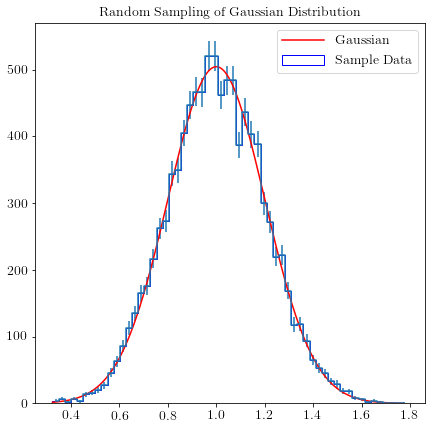

In [41]:
#--------------------------------Problem 2--------------------------------
#Creating Gaussian
mu = 1.0
sigma = 0.2
gauss = norm(mu,sigma)
#Random samples
N = 10000
g_sample = gauss.rvs(N)
x = np.linspace(min(g_sample), max(g_sample), N)

#Using fancyhist, plot the sampled data.
plt.figure(figsize=(7,7))
nums, bin_edges, __ = fancyhist(g_sample,
                                bins='freedman', 
                                histtype='step', 
                                color='b',
                                label='Sample Data'
                               )
#Calculate the true distribution and normalized it to the sampled data
#by multiplying by the area under the histrogram.
area = sum(np.diff(bin_edges)*nums)
normal_g = gauss.pdf(x)*area
#Plot true distribution
plt.plot(x, 
         normal_g, 
         color='r', 
         label='Gaussian'
        )
#Calculate bin center locations at which the error bars will be drawn
bin_centers = (bin_edges[1:] + bin_edges[:-1])*0.5
plt.errorbar(bin_centers, 
             nums, 
             yerr=nums**0.5, 
             marker='', 
             drawstyle='steps-mid'
            )
plt.title('Random Sampling of Gaussian Distribution')
plt.legend()
plt.show()

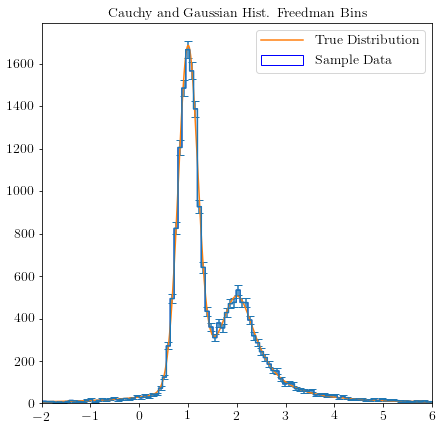

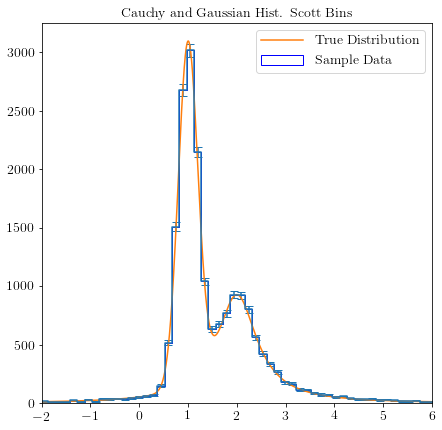

In [43]:
#--------------------------------Problem 3--------------------------------
#Create Gaussian object. Sample 10k random values
mu = 1.0
sigma = 0.2
gauss = norm(mu,sigma)
N = 10000
g_sample = gauss.rvs(N)

#Create Cauchy object. Sample 10k values.
mu_c = 2.0
gam = 0.5
cauchy_data = cauchy(2.0,0.5)
c_sample = cauchy_data.rvs(N)
#Combine Gaussian and Cauchy
gc_array = np.concatenate((g_sample, c_sample))

#Plot Freedman binned histogram of combined data.
plt.figure(figsize=(7,7))
nums, bin_edges, __ = fancyhist(gc_array,
                                bins='freedman', 
                                histtype='step', 
                                color='b',
                                label='Sample Data'
                               )
#Plot error by finding each bin's center and using count number
#from fancy hist function
bin_centers = (bin_edges[1:] + bin_edges[:-1])*0.5
plt.errorbar(bin_centers, 
             nums, 
             yerr=nums**0.5, 
             marker='', 
             drawstyle='steps-mid',
             capsize=4
            )
#Generate data for true gaussian+cauchy distribution
x = np.linspace(-2,6,10000)
cauchy_plot = cauchy_data.pdf(x)
gauss_plot = gauss.pdf(x)
#Normalize by multiplying dist by the area under the histogram
area = sum(np.diff(bin_edges)*nums)
combined_plot = area*(cauchy_plot+gauss_plot)/2
#Plot true distribution over histogram
plt.plot(x, combined_plot, label='True Distribution')
plt.xlim(-2,6)
plt.title('Cauchy and Gaussian Hist. Freedman Bins')
plt.legend()
plt.show()

#Begin New figure for Scott binned data
plt.figure(figsize=(7,7))
nums, bin_edges, __ = fancyhist(gc_array,
                                bins='scott', 
                                histtype='step',
                                range=(-5,9),
                                color='b',
                                label='Sample Data'
                               )
#Same error bar method
bin_centers = (bin_edges[1:] + bin_edges[:-1])*0.5
plt.errorbar(bin_centers, 
             nums, 
             yerr=nums**0.5, 
             marker='', 
             drawstyle='steps-mid',
             capsize=4
            )
area = sum(np.diff(bin_edges)*nums)
combined_plot = area*(cauchy_plot+gauss_plot)/2
plt.plot(x, combined_plot, label='True Distribution')
plt.xlim(-2,6)
plt.title('Cauchy and Gaussian Hist. Scott Bins')
plt.legend()
plt.show()

#COMMENTS
#It seems the Scott binning method is less accurate in creating a 
#histogram that fits to the true distribution. This is evident
#by visual inspection, the fact that more of the orange "true data" 
#line can be seen in the bottom plot. More analytically, the Scott
#binning method uses less bins to describe the region of the gaussian
#distribution. In addition, the Scott's method of binning had to be 
#significantly restrained as it would attempt to bin the extremely
#large tails of the Cauchy distribution while the Freedman mehtod
#did not.

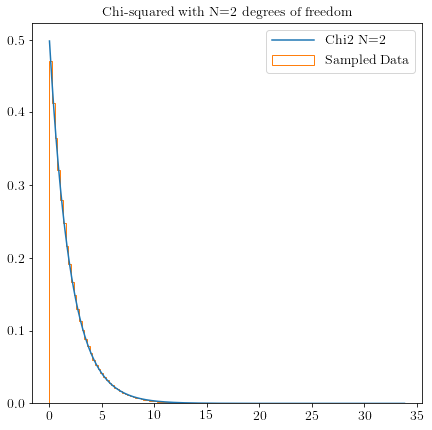

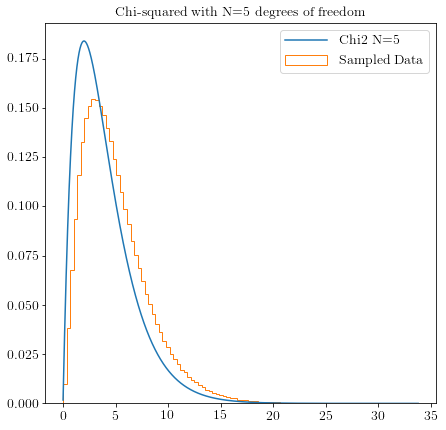

In [51]:
#--------------------------------Problem 4--------------------------------
#Create gaussian distribution
N = 2
K = 5
sample_num = 1000000
mu = 0
sigma = 1
gauss_dist = norm(mu,sigma)
chi_data_N = []
chi_data_K = []
#Taking 2 or 5 random picks from the gaussian, summing their squares
#and appending to a list so that it can be histogrammed
for i in range(sample_num):
    gauss_sample_N = gauss_dist.rvs(N)
    gauss_sample_K = gauss_dist.rvs(K)
    
    chi_data_N.append(sum(gauss_sample_N**2))
    chi_data_K.append(sum(gauss_sample_K**2))

#Creating appropriate x so that true chi-squared distribution can 
#be calculated for each degree of freedom: 2 and 5
x = np.linspace(min(chi_data_K),max(chi_data_K),sample_num)
chi2_dist_N = 1.0/(2*gamma(N/2))*(x/2)**(N/2-1)*np.exp(-x/2)
chi2_dist_K = 1.0/(2*gamma(K/2))*(x/2)**(K/2-1)*np.exp(-x/2)

#Plotting N=2 histogram and true distribution. Using non-fancy hist 
#this time just to try it out.
plt.figure(figsize=(7,7))
plt.plot(x, 
         chi2_dist_N, 
         label='Chi2 N=2'
        )
plt.hist(chi_data_N, 
         bins=100, 
         histtype='step', 
         normed=True, 
         label='Sampled Data'
        )
plt.title('Chi-squared with N=2 degrees of freedom')
plt.legend()
plt.show()

#And again for N=5
plt.figure(figsize=(7,7))
plt.plot(x, 
         chi2_dist_K, 
         label='Chi2 N=5'
        )
plt.hist(chi_data_K, 
         bins=100, 
         histtype='step', 
         normed=True, 
         label='Sampled Data'
        )
plt.title('Chi-squared with N=5 degrees of freedom')
plt.legend()
plt.show()